# Real Estate ML - Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS']

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: CHAS, Length: 506, dtype: int64

In [6]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
%matplotlib inline

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

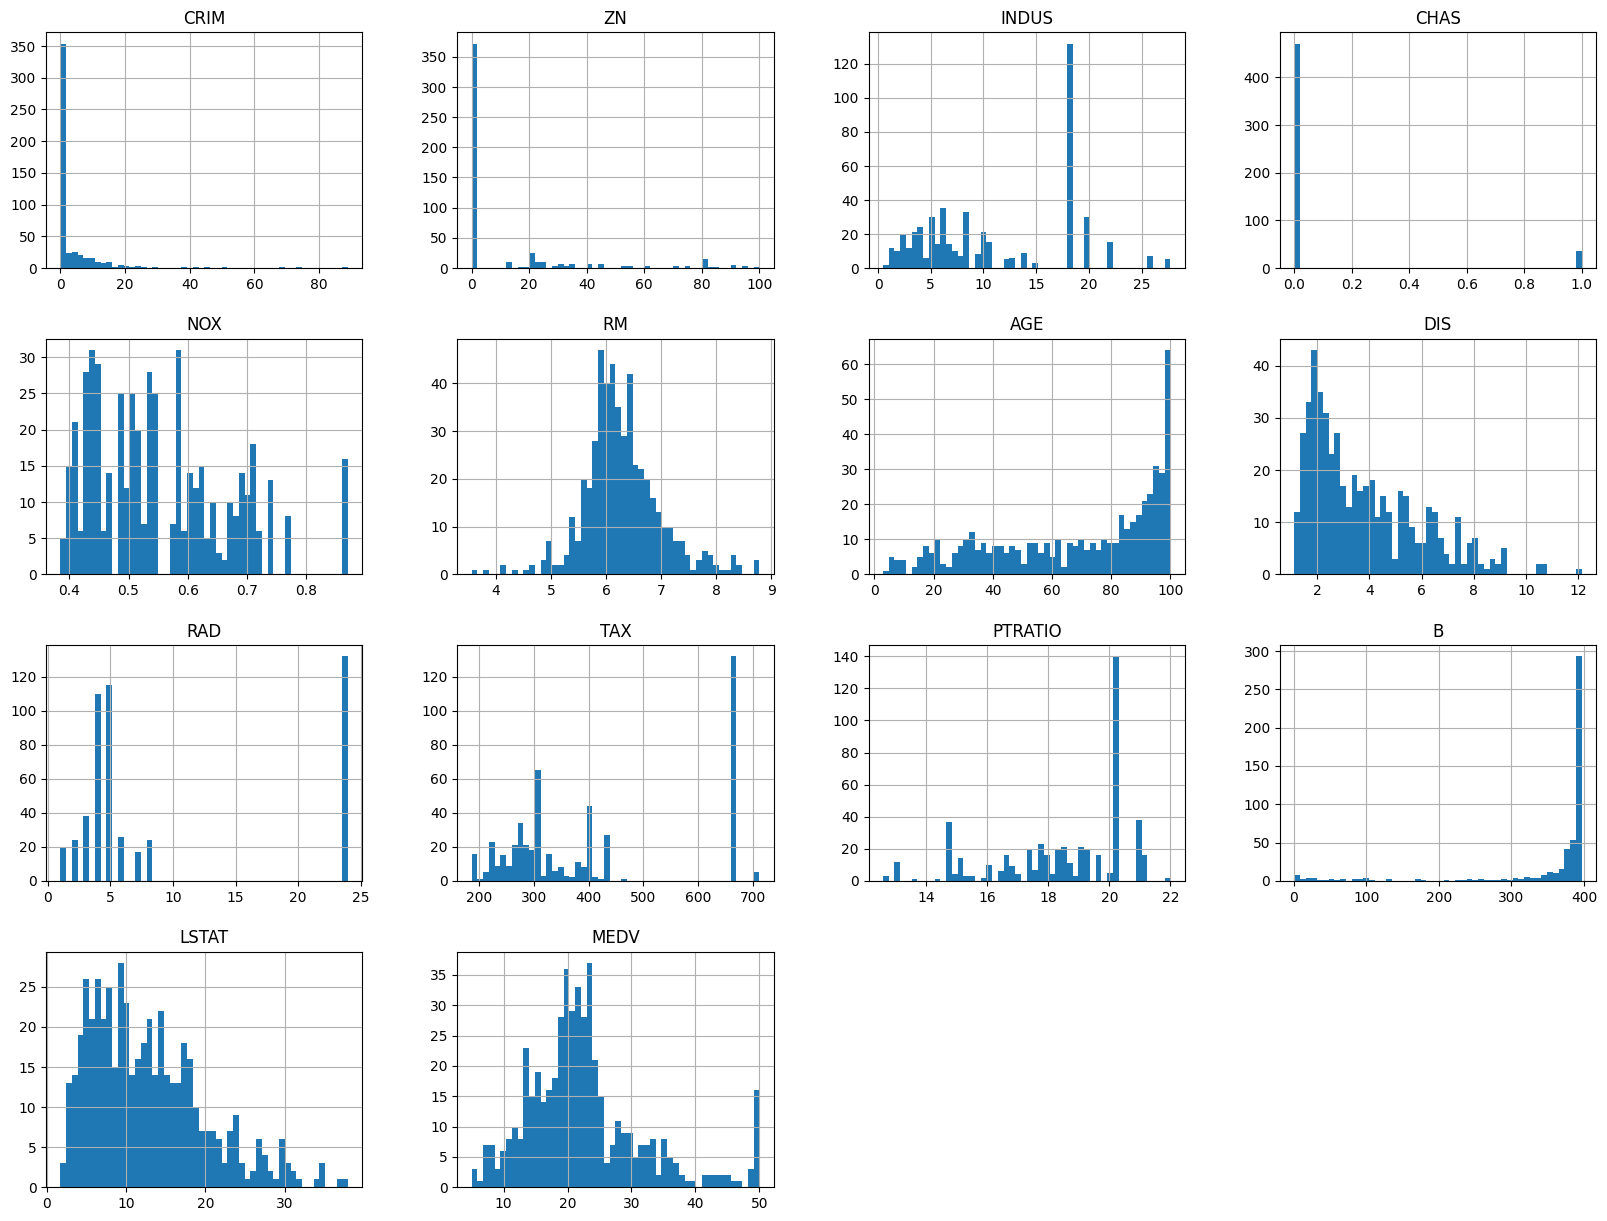

In [9]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))

## Data Splitting

In [10]:
import numpy as np

# def split_data(data, test_ratio):
#     np.random.seed(7)
#     shuffled = np.random.permutation(len(data))
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
    
#     return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=7)
print(f"Rows in Training Data: {len(train_set)}\nRows in Testing Data: {len(test_set)}")

Rows in Training Data: 404
Rows in Testing Data: 102


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=7)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

## Correlations

In [13]:
housing = strat_train_set.copy()
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.668967
B          0.311930
ZN         0.292800
DIS        0.200339
CHAS       0.132203
AGE       -0.328783
RAD       -0.353844
NOX       -0.397238
CRIM      -0.404437
TAX       -0.456295
INDUS     -0.459150
PTRATIO   -0.477584
LSTAT     -0.736119
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

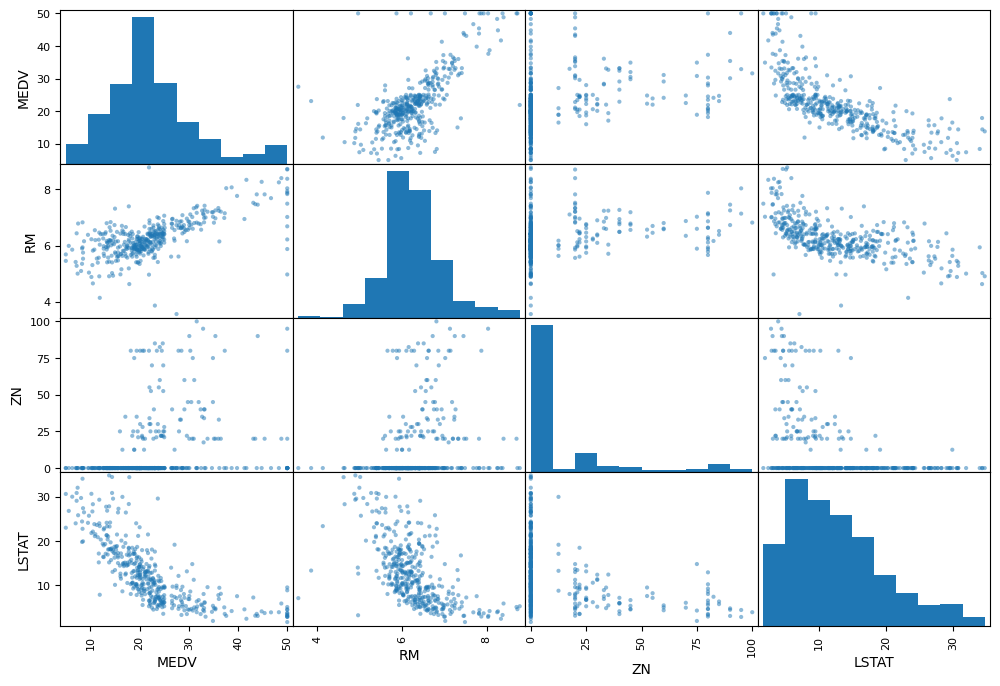

In [14]:
from pandas.plotting import scatter_matrix 
attributes = ["MEDV","RM", "ZN","LSTAT"]
scatter_matrix(housing[attributes], figsize=(12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

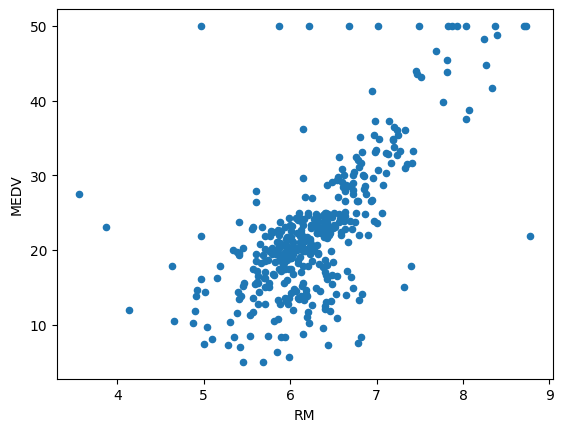

In [15]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=1)

## Attribute Combos

In [16]:
housing["TAXRM"] = housing['TAX']/housing['RM']

In [17]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.668967
B          0.311930
ZN         0.292800
DIS        0.200339
CHAS       0.132203
AGE       -0.328783
RAD       -0.353844
NOX       -0.397238
CRIM      -0.404437
TAX       -0.456295
INDUS     -0.459150
PTRATIO   -0.477584
TAXRM     -0.517722
LSTAT     -0.736119
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

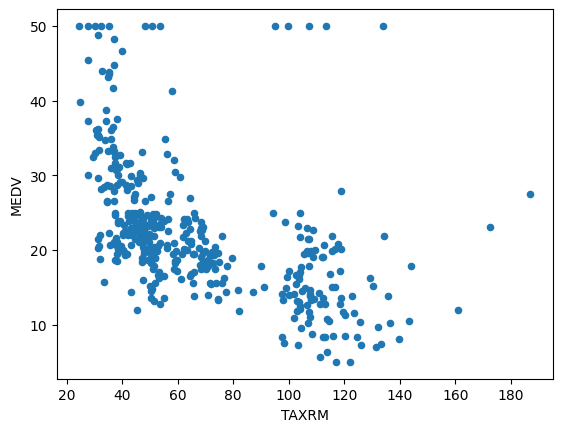

In [18]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=1)

In [19]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

In [20]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy="median")
# imputer.fit(housing)
# X = imputer.transform(housing)
# housing_tr = pd.DataFrame(X, columns=housing.columns)

# Pipeline

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std-scaler', StandardScaler())
])


In [22]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [23]:
housing_num_tr.shape

(404, 13)

## Desired Model

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model = LinearRegression()
# model = DecisionTreeRegressor()
# model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

LinearRegression()

In [25]:
some_data = housing.iloc[:5]
some_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
432,6.44405,0.0,18.10,0,0.584,6.425,74.8,2.2004,24,666,20.2,97.95,12.03
29,1.00245,0.0,8.14,0,0.538,6.674,87.3,4.2390,4,307,21.0,380.23,11.98
146,2.15505,0.0,19.58,0,0.871,5.628,100.0,1.5166,5,403,14.7,169.27,16.65
441,9.72418,0.0,18.10,0,0.740,6.406,97.2,2.0651,24,666,20.2,385.96,19.52
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15


In [26]:
some_labels = housing_labels.iloc[:5]

In [27]:
prepared_data = my_pipeline.transform(some_data)

In [28]:
model.predict(prepared_data)

array([21.86948403, 21.00447278, 16.4768323 , 17.02418145, 23.80226736])

In [29]:
list(some_labels)

[16.1, 21.0, 15.6, 17.1, 23.0]

## Evaluation

In [30]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [31]:
lin_mse

22.958190022161507

## Cross Validation

In [32]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [33]:
rmse_scores

array([3.7823348 , 5.25919661, 3.26177564, 3.53833939, 5.37342171,
       2.6642703 , 5.56865706, 9.21193811, 3.90921964, 5.27515552])

In [34]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [35]:
print_scores(rmse_scores)

Scores: [3.7823348  5.25919661 3.26177564 3.53833939 5.37342171 2.6642703
 5.56865706 9.21193811 3.90921964 5.27515552]
Mean:  4.784430877124199
Standard Deviation:  1.7654305259911875


## Saving Model

In [36]:
from joblib import dump, load
dump(model, 'ML.joblib')

['ML.joblib']

## Testing Model

In [37]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[14.90969028 30.02482604 20.35534322 19.42062434 19.23443089 16.47468875
 33.62876209 22.90166622 20.86063798 19.52341015  0.25201567 28.64940899
 22.99830939 11.31582707 34.21693116 27.84116801 16.5838616  35.16380033
 43.04107783 21.13657708 28.17266066 20.53544166 33.80256026  3.14162585
 18.48062187 25.18009747 30.03765009 19.45320637 39.98956408 30.56400853
 18.0480254  31.30283477 34.47110018 -5.22206915 20.81709478 35.46926427
 41.14306047 13.96184885 19.25820321 28.0997784  20.94302499 16.63521638
 22.96906055 28.37766439  4.88822714 23.88969418 23.68915806 13.79525092
 39.39501966 17.39528889 25.16986923 13.85624703 18.85938463 20.49000559
 21.6545552  14.59682076 28.109787   22.19183011 17.71823732 24.60919901
 25.1560909  25.31501387 20.50446123 18.91156207 17.89816699 11.88312972
 26.86138262 16.43166608 18.55504577 16.83045553 29.0523034  19.56152693
 26.01848065 29.18305653 17.22531228 27.20436508 28.86535522 22.48015882
 24.41388261 22.99518608 17.3175959  14.52983197 26

In [38]:
final_rmse

4.323427406921794

In [96]:
from sklearn.metrics import r2_score

In [97]:
# Calculate the R-squared value of the model
r_squared = r2_score(Y_test, final_predictions)

print("R-squared:", r_squared)

R-squared: 0.7641910776631937


In [99]:
# Calculate the number of predictor variables (features)
num_features = X_test_prepared.shape[1]
num_features

# Calculate the number of observations in the dataset
num_observations = len(housing)

# Calculate the adjusted R-squared value
adjusted_r_squared = 1 - (1 - r_squared) * (num_observations - 1) / (num_observations - num_features - 1)

print("Adjusted R-squared:", adjusted_r_squared)

Adjusted R-squared: 0.7563307802519669


# Decesion Tree

In [49]:
model1 = DecisionTreeRegressor()

In [50]:
model1.fit(housing_num_tr, housing_labels)

DecisionTreeRegressor()

In [55]:
model1.predict(prepared_data)

array([16.1, 21. , 15.6, 17.1, 23. ])

In [56]:
list(some_labels)

[16.1, 21.0, 15.6, 17.1, 23.0]

In [57]:
from sklearn.metrics import mean_squared_error
housing_predictions = model1.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [58]:
lin_mse

0.0

In [59]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model1, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [60]:
rmse_scores

array([3.95871992, 3.87458888, 4.71732665, 3.43220046, 5.79100596,
       2.87293404, 5.09541461, 8.55049706, 3.47997845, 3.39396523])

In [61]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [62]:
print_scores(rmse_scores)

Scores: [3.95871992 3.87458888 4.71732665 3.43220046 5.79100596 2.87293404
 5.09541461 8.55049706 3.47997845 3.39396523]
Mean:  4.51666312625819
Standard Deviation:  1.5876906250818388


In [63]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model1.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[10.2 30.3 19.6 16.3 20.6 16.5 34.9 20.1 21.2 17.7 11.9 28.7 24.7 13.8
 34.7 37.3 11.7 34.9 38.7 21.4 24.5 20.  24.8 10.5 17.8 24.7 22.3 21.2
 50.  28.7 14.5 29.8 43.1 10.2 18.9 37.3 50.  13.5 13.1 31.6 20.1 17.1
 23.9 23.7  7.2 24.1 28.6 16.1 44.   5.6 24.8 14.8 15.1 22.4 20.6 15.2
 23.9 23.8 13.1 22.2 23.3 23.  19.6 19.3 19.4 13.1 11.9 20.3 13.1 14.1
 25.  17.5 23.4 28.7 12.7 28.7 38.7 20.7 18.5 20.5 16.4 15.6 20.  34.9
 20.1 24.2 18.9 14.1 30.3 21.2 18.9 22.3 16.5  9.5 23.  14.1 15.6 43.1
 39.8 11.8 18.7 21.2] [13.1, 37.0, 19.2, 27.5, 20.8, 17.3, 34.6, 24.4, 19.3, 22.6, 13.8, 24.4, 21.2, 12.0, 37.9, 36.2, 10.2, 33.3, 50.0, 21.5, 23.3, 19.3, 32.0, 8.8, 19.8, 25.3, 24.0, 20.6, 50.0, 32.2, 19.6, 31.5, 35.2, 7.0, 18.8, 33.4, 48.5, 14.5, 15.2, 31.2, 20.4, 17.6, 20.6, 26.4, 8.8, 21.4, 26.2, 10.9, 46.0, 7.2, 22.9, 13.9, 18.4, 21.7, 21.7, 13.1, 23.7, 21.2, 14.9, 25.0, 28.1, 29.8, 15.3, 18.2, 16.6, 10.4, 22.6, 18.6, 16.1, 19.1, 22.9, 17.1, 21.6, 34.9, 23.2, 25.2, 42.8, 20.6, 23.1, 24.7, 14.3

In [64]:
final_rmse

3.6694419087333467

# Hyperparameter Tuning

In [67]:
from sklearn.model_selection import GridSearchCV

In [119]:
param_grid1 = {
    'max_depth' :[2,4,6,8,10,None],
    'criterion' :['squared_error','absolute_error'],
    'max_features':[0.25,.5,1.0,1.5,1.75,2],
    'min_samples_split': [0.15,0.25,0.5,1.0]
}

In [120]:
reg = GridSearchCV(DecisionTreeRegressor(), param_grid= param_grid1)

In [121]:
reg.fit(housing_num_tr, housing_labels)


C:\Users\SUJASH\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
480 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SUJASH\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SUJASH\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\SUJASH\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py", line 637, in _validate_params
   

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 4, 6, 8, 10, None],
                         'max_features': [0.25, 0.5, 1.0, 1.5, 1.75, 2],
                         'min_samples_split': [0.15, 0.25, 0.5, 1.0]})

In [122]:
# Get the best parameters and the corresponding best score
best_params = reg.best_params_
best_score = reg.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)

Best parameters: {'criterion': 'absolute_error', 'max_depth': None, 'max_features': 0.5, 'min_samples_split': 0.15}
Best score: 0.6800075014346337


In [125]:
model2 = DecisionTreeRegressor(criterion= 'absolute_error', max_depth= None, max_features= 0.5, min_samples_split= 0.15)

In [126]:
model2.fit(housing_num_tr, housing_labels)

DecisionTreeRegressor(criterion='absolute_error', max_features=0.5,
                      min_samples_split=0.15)

In [156]:
from sklearn.tree import plot_tree

[Text(0.609375, 0.9285714285714286, 'x[5] <= 0.389\nabsolute_error = 6.424\nsamples = 404\nvalue = 21.1'),
 Text(0.40625, 0.7857142857142857, 'x[12] <= 0.317\nabsolute_error = 4.137\nsamples = 290\nvalue = 19.5'),
 Text(0.1875, 0.6428571428571429, 'x[7] <= -1.126\nabsolute_error = 2.766\nsamples = 169\nvalue = 21.4'),
 Text(0.125, 0.5, 'absolute_error = 5.525\nsamples = 4\nvalue = 50.0'),
 Text(0.25, 0.5, 'x[5] <= -0.255\nabsolute_error = 2.274\nsamples = 165\nvalue = 21.4'),
 Text(0.125, 0.35714285714285715, 'x[7] <= -0.629\nabsolute_error = 1.914\nsamples = 80\nvalue = 20.1'),
 Text(0.0625, 0.21428571428571427, 'absolute_error = 1.953\nsamples = 17\nvalue = 21.4'),
 Text(0.1875, 0.21428571428571427, 'x[7] <= -0.565\nabsolute_error = 1.806\nsamples = 63\nvalue = 19.9'),
 Text(0.125, 0.07142857142857142, 'absolute_error = 2.64\nsamples = 5\nvalue = 16.8'),
 Text(0.25, 0.07142857142857142, 'absolute_error = 1.591\nsamples = 58\nvalue = 20.0'),
 Text(0.375, 0.35714285714285715, 'x[6] <= 

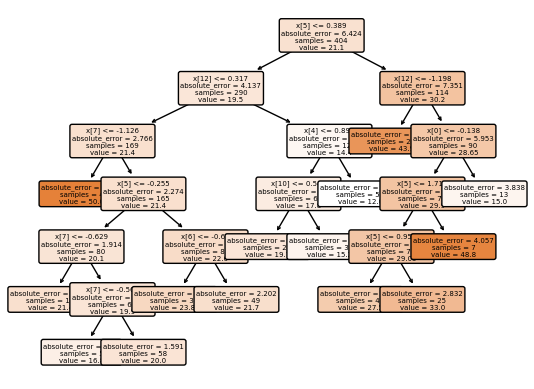

In [164]:
plot_tree(model2, fontsize=5, filled=True, rounded=True)

In [127]:
model2.predict(prepared_data)

array([21.7 , 27.5 , 12.  , 12.  , 23.85])

In [128]:
list(some_labels)

[16.1, 21.0, 15.6, 17.1, 23.0]

In [129]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model2, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [130]:
rmse_scores

array([4.04904385, 5.41721511, 4.99082695, 7.95947817, 5.51909753,
       3.36084997, 4.89094188, 8.66203642, 3.74956664, 3.89704215])

In [131]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [132]:
print_scores(rmse_scores)

Scores: [4.04904385 5.41721511 4.99082695 7.95947817 5.51909753 3.36084997
 4.89094188 8.66203642 3.74956664 3.89704215]
Mean:  5.249609866241114
Standard Deviation:  1.6844200626286487


In [133]:
final_predictions = model2.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[12.   33.   21.7  15.   21.4  19.7  33.   20.   20.   21.7  12.   21.7
 20.   15.2  33.   33.   15.2  43.9  43.9  21.7  27.5  21.7  43.9  12.
 19.7  23.85 27.5  20.   43.9  33.   20.   43.9  48.8  12.   19.7  33.
 43.9  15.2  15.   27.5  21.7  20.   21.7  23.85 12.   23.85 27.5  21.7
 43.9  12.   23.85 15.2  12.   19.7  20.   15.2  23.85 23.85 12.   23.85
 23.85 15.   21.4  20.   19.7  15.   20.   20.   12.   15.2  21.7  21.7
 21.7  33.   12.   23.85 43.9  20.   21.7  20.   12.   12.   20.   43.9
 20.   20.   20.   15.   33.   20.   20.   23.85 19.7  12.   21.7  12.
 12.   48.8  43.9  15.   20.   21.4 ] [13.1, 37.0, 19.2, 27.5, 20.8, 17.3, 34.6, 24.4, 19.3, 22.6, 13.8, 24.4, 21.2, 12.0, 37.9, 36.2, 10.2, 33.3, 50.0, 21.5, 23.3, 19.3, 32.0, 8.8, 19.8, 25.3, 24.0, 20.6, 50.0, 32.2, 19.6, 31.5, 35.2, 7.0, 18.8, 33.4, 48.5, 14.5, 15.2, 31.2, 20.4, 17.6, 20.6, 26.4, 8.8, 21.4, 26.2, 10.9, 46.0, 7.2, 22.9, 13.9, 18.4, 21.7, 21.7, 13.1, 23.7, 21.2, 14.9, 25.0, 28.1, 29.8, 15.3, 18.2, 16.6, 1

In [134]:
final_rmse

4.504676219567534

# Random Forest

In [137]:
model_rf = RandomForestRegressor()
model_rf.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [138]:
model_rf.predict(prepared_data)

array([17.522, 21.717, 15.833, 15.283, 23.463])

In [139]:
list(some_labels)

[16.1, 21.0, 15.6, 17.1, 23.0]

In [142]:
housing_predictions = model_rf.predict(housing_num_tr)
rf_mse = mean_squared_error(housing_labels, housing_predictions)
rf_rmse = np.sqrt(lin_mse)

In [147]:
rf_mse

1.5135992920792076

In [149]:
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [150]:
rmse_scores

array([3.80602859, 3.88552661, 4.51855254, 3.52022034, 5.80826997,
       3.15638242, 5.01873988, 8.66710736, 3.14579084, 3.01102142])

In [151]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [152]:
print_scores(rmse_scores)

Scores: [3.80602859 3.88552661 4.51855254 3.52022034 5.80826997 3.15638242
 5.01873988 8.66710736 3.14579084 3.01102142]
Mean:  4.453763997863958
Standard Deviation:  1.6431616334888912


In [154]:
final_predictions = model_rf.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[10.034 30.845 20.443 16.24  20.683 16.831 32.299 20.899 20.214 20.625
 12.066 26.004 21.463 13.253 36.906 34.503 14.876 33.837 45.179 19.986
 26.311 19.997 31.949  8.81  19.545 24.423 28.014 20.146 47.972 30.045
 19.199 32.228 41.753  8.561 19.147 35.327 47.596 15.05  15.71  29.759
 20.026 18.818 18.79  23.541  8.665 22.437 26.473 15.825 45.798 10.326
 23.712 16.003 15.732 21.094 20.508 14.64  24.244 21.57  15.487 23.062
 23.438 23.396 20.948 19.818 19.864 14.685 21.407 20.844 15.82  14.272
 22.563 18.465 21.066 31.868 14.941 25.799 42.162 21.131 22.273 21.157
 15.128 15.981 21.502 35.187 20.29  22.905 19.709 15.12  31.971 20.331
 20.036 23.237 20.833 10.641 21.559 13.316 16.107 44.236 42.4   11.93
 20.942 20.804] [13.1, 37.0, 19.2, 27.5, 20.8, 17.3, 34.6, 24.4, 19.3, 22.6, 13.8, 24.4, 21.2, 12.0, 37.9, 36.2, 10.2, 33.3, 50.0, 21.5, 23.3, 19.3, 32.0, 8.8, 19.8, 25.3, 24.0, 20.6, 50.0, 32.2, 19.6, 31.5, 35.2, 7.0, 18.8, 33.4, 48.5, 14.5, 15.2, 31.2, 20.4, 17.6, 20.6, 26.4, 8.8, 21.4, 2

In [155]:
final_rmse

2.8375866765719806

In [ ]:
#lr_test_rmse=4.324
#dt_test_rmse =4.504
#rf_test_rmse = 2.837